# Insights for Stakeholders

## Lesson Objectives
By the end of this lesson, students will be able to:
- Define the stakeholder and their business problem that will be the guiding framework for this week's lessons.
- Identify the target and features for a machine learning model to use for insights
- Understand how different feature/target choices can provide a different spin/perspective on the problem.

## The Stakeholder

- We've been hired by a school district that wants to use data science to identify and support high school students at risk of poor performance. 

- They have provided us with data on several hundred of their former students and want to identify students who are at risk of poor grades/performance by year 3.
    - The school included 3 years of grades(presumable grades 10-12), which are labeled as (G1-G3).
    - They sent us an excel file with 3 sheets:
        - student-mat: grades for Math (the student-mat sheet)
        - student-por: grades for Portuguese
        - README: data dictionary

- The goal is to identify these students and provide additional support/tutoring to improve their academic performance.

### Our Task

- Develop machine-learning models to predict student performance in their final year (year 3).
- We will then use our model(s) to extract insights into which students are most at-risk for poor performance. 
- We will provide a summary of our findings and 3 recommendations to the school on how to best identify these at-risk students. 


We will be focusing on the Math grades to start.

### Stakeholder Considerations

- Before diving into modeling, let's examine the data the school district has provided us and let's brainstorm/discuss our approach for our models.

# EDA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Customization Options
# pd.set_option("display.max_columns",100)
plt.style.use(('ggplot','tableau-colorblind10'))
sns.set_context('notebook')
mpl.rcParams['figure.facecolor']='white'

In [2]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS6xDKNpWkBBdhZSqepy48bXo55QnRv1Xy6tXTKYzZLMPjZozMfYhHQjAcC8uj9hQ/pub?output=xlsx"

df = pd.read_excel(url,sheet_name='student-por')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   age         649 non-null    float64
 3   address     649 non-null    object 
 4   famsize     649 non-null    object 
 5   Pstatus     649 non-null    object 
 6   Medu        649 non-null    float64
 7   Fedu        649 non-null    float64
 8   Mjob        649 non-null    object 
 9   Fjob        649 non-null    object 
 10  reason      649 non-null    object 
 11  guardian    649 non-null    object 
 12  traveltime  649 non-null    float64
 13  studytime   649 non-null    float64
 14  failures    649 non-null    float64
 15  schoolsup   649 non-null    object 
 16  famsup      649 non-null    object 
 17  paid        649 non-null    object 
 18  activities  649 non-null    object 
 19  nursery     649 non-null    o

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,4.0,3.0,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,5.0,3.0,3.0,1.0,1.0,3.0,2.0,9.0,11.0,11.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,4.0,3.0,2.0,2.0,3.0,3.0,6.0,12.0,13.0,12.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,3.0,2.0,2.0,1.0,1.0,5.0,0.0,14.0,14.0,14.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,4.0,3.0,2.0,1.0,2.0,5.0,0.0,11.0,13.0,13.0


### Data Dictionary
Source:  https://archive.ics.uci.edu/ml/datasets/student+performance 

- 1) school: student's school (binary: 'GP' - Gabriel - Pereira or 'MS' - Mousinho da Silveira)
- 2) sex: student's sex (binary: 'F' - female or 'M' - - male)
- 3) age: student's age (numeric: from 15 to 22)
- 4) address: student's home address type (binary: 'U' - - urban or 'R' - rural)
- 5) famsize: family size (binary: 'LE3' - less or equal - to 3 or 'GT3' - greater than 3)
- 6) Pstatus: parent's cohabitation status (binary: 'T' - - living together or 'A' - apart)
- 7) Medu: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 Ã¢â‚¬â€œ 5th to 9th grade, 3 Ã¢â‚¬â€œ secondary education or 4 Ã¢â‚¬â€œ - higher education)
- 8) Fedu: father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 Ã¢â‚¬â€œ 5th to 9th grade, 3 Ã¢â‚¬â€œ secondary education or 4 Ã¢â‚¬â€œ - higher education)
- 9) Mjob: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or - police), 'at_home' or 'other')
- 10) Fjob: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or - police), 'at_home' or 'other')
- 11) reason: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' - preference or 'other')
- 12) guardian: student's guardian (nominal: 'mother', - 'father' or 'other')
- 13) traveltime: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, - or 4 - >1 hour)
- 14) studytime: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 - hours)
- 15) failures: number of past class failures (numeric: n - if 1<=n<3, else 4)
- 16) schoolsup: extra educational support (binary: yes - or no)
- 17) famsup: family educational support (binary: yes or - no)
- 18) paid: extra paid classes within the course subject (- Math or Portuguese) (binary: yes or no)
- 19) activities: extra-curricular activities (binary: - yes or no)
- 20) nursery: attended nursery school (binary: yes or no)
- 21) higher: wants to take higher education (binary: yes - or no)
- 22) internet: Internet access at home (binary: yes or - no)
- 23) romantic: with a romantic relationship (binary: yes - or no)
- 24) famrel: quality of family relationships (numeric: - from 1 - very bad to 5 - excellent)
- 25) freetime: free time after school (numeric: from 1 - - very low to 5 - very high)
- 26) goout: going out with friends (numeric: from 1 - - very low to 5 - very high)
- 27) Dalc: workday alcohol consumption (numeric: from 1 - - very low to 5 - very high)
- 28) Walc: weekend alcohol consumption (numeric: from 1 - - very low to 5 - very high)
- 29) health: current health status (numeric: from 1 - - very bad to 5 - very good)
- 30) absences: number of school absences (numeric: from - 0 to 93)
- 31) G1: first period grade (numeric: from 0 to 20)
- 31) G2: second period grade (numeric: from 0 to 20)
- 32) G3: final grade (numeric: from 0 to 20, output - target)

### Exploratory Data Analysis

- We need to get an overview of this dataset and we'd like to get it quickly. While it is good practice to manually perform the EDA steps, we can also leverage additional tools/packages for quick dataset inspection.

In [3]:
def summarize_df(df_):
    df = df_.copy()
    report = pd.DataFrame({             
            'dtype':df.dtypes,
             '# null': df.isna().sum(),
             'null (%)': df.isna().sum()/len(df)*100,
        'nunique':df.nunique(),
        "min":df.min(),
        'max':df.max()
             })
    report.index.name='Column'
    return report.reset_index()



summarize_df(df)

,Column,dtype,# null,null (%),nunique,min,max
0,school,object,0,0.0,2,GP,MS
1,sex,object,0,0.0,2,F,M
2,age,float64,0,0.0,8,15.0,22.0
3,address,object,0,0.0,2,R,U
4,famsize,object,0,0.0,2,GT3,LE3
5,Pstatus,object,0,0.0,2,A,T
6,Medu,float64,0,0.0,5,0.0,4.0
7,Fedu,float64,0,0.0,5,0.0,4.0
8,Mjob,object,0,0.0,5,at_home,teacher
9,Fjob,object,0,0.0,5,at_home,teacher


## Exploring Our Target

- The stakeholder wants to identify students based on their predicted performance in their final year. 
    - "G1","G2","G3" are the student final score at the end of years 1-3.


- One approach we could take is treat this as a regression task, with G3 as our target.
    - This would allow us to predict the exact final grade of each student.
    
    

### Types of Model-Based Insights

There are several approaches available to us for modeling-based insights. 

First, we will examine big-picture insights for the entire model/dataset. Some options include:

    
- Use tree-based regression models for Feature Importance.
    - Which features are the most helpful for predicting grade?  (built-in importance)
    - Which features damage the model's performance the most when shuffled? (permutation importance).

- Use a Linear Regression to extract coefficients.
    - Unscaled: exact effect on final grade of each feature.
    - Scaled: features that are the most important for final grade.
    
We could also treat this as a classification task by creating a "at-risk" or "under-performing" classification column based on grades.
    - We can then leverage additional model explanation tools to understand which features make a student more likely to under-perform.
    
Second, we will select stakeholder-appropriate visualizations to summarize our findings.
- We can leverage additional explanation packages to help us illustrate how a specific student's features influence their predicted performance.  
    


## EDA

- Before we dive into modeling, let's take a moment for some EDA visualizations to help us get a sense of our target. 


### Visualizing Grades

Text(0.5, 1.0, 'Distribution of Final Grades')

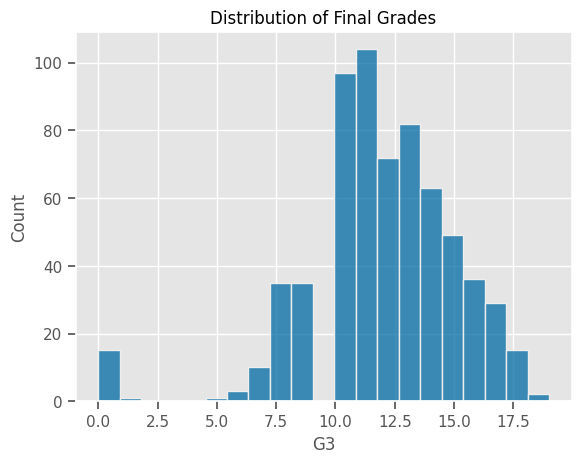

In [4]:
ax = sns.histplot(data=df,x='G3');
ax.set_title("Distribution of Final Grades")

- The school district informed us that they consider anything below 12 points to be a failing grade.

In [5]:
df['Pass?'] = df["G3"] >=12
df['Pass?'].value_counts(normalize=True)

True     0.53621
False    0.46379
Name: Pass?, dtype: float64

In [6]:
## Replace True/False with Group names
df['Pass?'] = df['Pass?'].replace({True:"Pass",False:'Fail'})
df['Pass?'].value_counts(normalize=True)

Pass    0.53621
Fail    0.46379
Name: Pass?, dtype: float64

- We can see that 54% of students pass.

(0.0, 20.0)

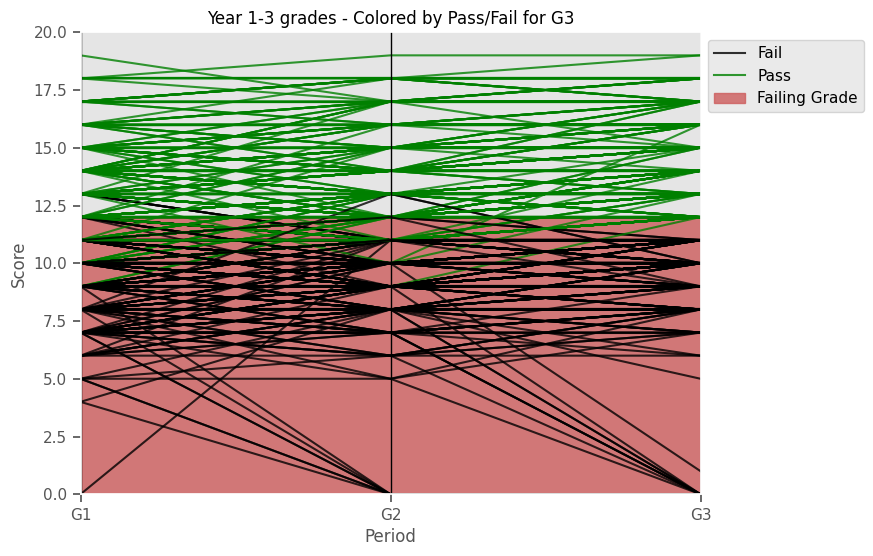

In [7]:
## Plot visual using Final year Groups for colors

fig, ax = plt.subplots(figsize=(8,6))
pd.plotting.parallel_coordinates(df,'Pass?',cols=['G1','G2','G3'],
                                      color=['black','green'], ax=ax,
                                      sort_labels=False,alpha=0.8)
ax.set(title="Year 1-3 grades - Colored by Pass/Fail for G3",
      ylabel='Score', xlabel='Period');
ax.axhspan(ymin=0,ymax=12,label='Failing Grade',color='indianred',alpha=0.8)

ax.legend(bbox_to_anchor=[1,1])
ax.set_ylim(bottom=0,top=20)

- Looking at our parallel coordinates plot - grouped by Pass/Fail, we can see that there were students in the Passing group (Green lines), who were originally getting failing grades for G1 and G2 (their scores are in the red Failing Grade region). They ultimately were able to raise their grade by G3.


- We can also see that there were 1-2 students in the Failing group (black lines), that had passing grades for G1 G2 (though still very low grades).

- We also notice that there are a lot of zeroes that appear in G2 and G3, what we can see all that lines that were 0 for G2 stayed at 0 for G3. The school district did not provide us with information to explain these 0's, so we will assume they are legitimate scores for now.

## Next Steps
-  Now that we have an idea of the target we are analyzing, we are ready to move onto modeling!

- We will start by exploring answering our stakeholder's question(s) with regression modeling.
- Let's get started!